
#   A2: Python Analysis Project
##  **Bike Rental Analysis**
*Python Project by Grecia Zarella Alvarez Leyva*

### **1. Introduction**
The rental bike emerged strongly in 2020 during the pandemic, when people started to seek safer and more flexible ways to move around the city. Since then, it has become helpful among students and then among business professionals who value more convenience and sustainability options. Additionally, tourism and seasonal factors, especially the summer season, were key drivers of rental demand. Moreover, tourism destinations encourage renting and driving around the city as another way to do a personal tour. More cities are becoming greener in transportation, and rental companies wanting to develop and expand their business must keep an eye on rental trends. By aligning their strategies with these evolving consumer preferences and environmental shifts, companies can position themselves for long-term growth and consider expanding into emerging markets such as Latin America.

In [9]:
import pandas as pd

# Dataset location
file = "bikes_data.xlsx"

# Reading the file
bikes = pd.read_excel(io = file,
              sheet_name = 0,
                  header = 0)
# Show only the first 5 rows
bikes.head(n=5)


,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Season,Holiday,RENTALS
0,1,Jan,Sunday,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Yes,221
1,2,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Yes,268
2,3,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Winter,Yes,335
3,4,Jan,Sunday,17,1.8,33,3.3,1913,-12.8,0.18,0.0,0.0,Winter,Yes,299
4,5,Jan,Sunday,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,Winter,Yes,225


In [11]:
# Show dataset overall information: Columns, data types, and non-null count
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1387 non-null   int64  
 1   Month                  1387 non-null   object 
 2   Day of Week            1387 non-null   object 
 3   Hour                   1387 non-null   int64  
 4   Temperature            1387 non-null   float64
 5   Humidity               1387 non-null   int64  
 6   Wind Speed             1387 non-null   float64
 7   Visibility             1387 non-null   int64  
 8   Dew Point Temperature  1387 non-null   float64
 9   UV Index               1387 non-null   float64
 10  Rainfall               1387 non-null   float64
 11  Snowfall               1387 non-null   float64
 12  Season                 1387 non-null   object 
 13  Holiday                1387 non-null   object 
 14  RENTALS                1387 non-null   int64  
dtypes: f

#### Code Analysis
.info()This information helps confirm the structure of the dataset, including the column names, Data type, and the total counts of non-null value

### **2. Insights**
#### **2.1 Insight One: "Growing Demand for Rental Bicycles"**
The bike rental business is growing, driven by consumers becoming more aware of environmental sustainability and seeking to avoid traffic congestion and harmful carbon emissions. Moreover, consumers found another way to save time and money. *According to Grand View Research (2024)*, the market is projected to grow at a rate of 16.8% from 2024 to 2030 in bikes and scooters. Being one of the major drivers is the demand for eco-friendly transportation and the desire to incorporate physical activity into daily routine, perfect exercises that consumers can find in traditional bikes and e-bikes (including motors). Today, bicycle rentals have become a trend, helpful among workers, business professionals, and students. They are very popular among tourists, finding it more convenient and flexible for getting around the city.

In [15]:
# Descriptive statistics on non-numeric columns.
bikes.describe(include='object')

,Month,Day of Week,Season,Holiday
count,1387,1387,1387,1387
unique,12,7,4,2
top,June,Thursday,Summer,No
freq,129,216,374,1322


In [17]:
# Count the total frequency of each season in the dataset.
bikes[ 'Season'].value_counts()

Season
Summer    374
Spring    345
Winter    340
Autumn    328
Name: count, dtype: int64

In [19]:
# Sum the total rentals by each season and order the result in descending order.
bikes.groupby('Season')['RENTALS'].sum().sort_values(ascending=False)

Season
Summer    420714
Autumn    346564
Spring    269509
Winter     86705
Name: RENTALS, dtype: int64

#### Code Analysis
In the previous section, we identified the frequency of key variables within the dataset. Then, we started to break down in specific variables, such as season, month, day of the week, and holiday day or not. The last function is helpful to calculate the total number of rentals by season, and sort them in descending order. This allows us to understand the patterns and the peaks in the majority of users.

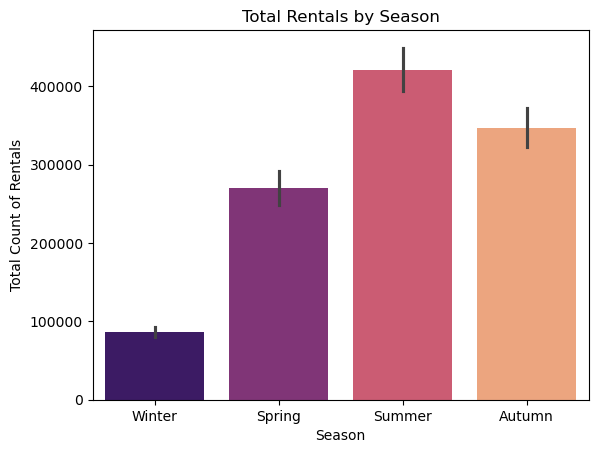

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a Bar chart showing total rentals by season
sns.barplot(data = bikes,    # dataset
               x = 'Season', # x-axis represent the "season"
               y ='RENTALS', # y-axis represents the number of rentals
             hue = 'Season', # Color focus in season column
       estimator = sum,
         palette ='magma')   # Palette color

# Titles and Axis labels
plt.title       (label  = 'Total Rentals by Season')
plt.xlabel      (xlabel = 'Season'          )
plt.ylabel      (ylabel = 'Total Count of Rentals')
# Showing the final visualization
plt.show        () 


### Seasonal Bike Rentals Analysis
This bar chart represents the total number of bike rentals for each season. After analyzing the data, we observed that most users tend to rent bikes in the Summer and Autumn, with 420,714 and 346,564 rentals, respectively. These results suggest that favorable weather conditions during these seasons encourage bike usage. Winter, however, contains the least number of rentals, which could be a result of low temperatures, rainfall, and wind speed. Autumn ranks second in total rentals, showing a steady volume regardless of holidays. The use of color allows easy distinction of seasonal trends, effectively making the visualization a quick comparison of seasonal rental patterns. This insight can help rental bike companies to enhance their marketing strategies during the year.


#### **2.2 Insight Two: "Ideal Weather Conditions for Bike Rental Demand"**
Based on a recent study in Seoul, South Korea *(Jang et al.,2024)* confirms the relation between rental bikes and weather conditions as a factor to significantly impacts the rental demand for bikes. Their study reflects that through the exploration of the dataset and establishment relationship between variables, the key features to drive the demand for rental bikes include temperature, humidity, wind speed, visibility, solar radiation, rainfall, snowfall, hours of the day, season, and holidays. The study concluded that temperature, wind speed, and rainfall were the most affecting factors. The highest number of rentals resulted from days with warm temperatures and no rain. Even though this research is specific to Seoul, it resonates with our overall trend seen in our dataset. Riders prefer to rent bikes in hot, dry, and comfortable weather conditions.

In [25]:
# Descriptive Statistics on numeric columns, the table will show only with two decimals.
bikes.describe(include='number').round(decimals=2)

,ID,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
count,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00,1387.00
mean,694.00,11.55,13.09,58.76,1.71,1434.42,4.37,0.57,0.14,0.08,810.02
std,400.54,6.92,11.90,20.56,1.02,618.09,13.10,0.87,1.26,0.44,694.72
min,1.00,0.00,-15.80,11.00,0.00,81.00,-30.50,0.00,0.00,0.00,5.00
25%,347.50,6.00,3.20,43.00,0.90,946.00,-4.40,0.00,0.00,0.00,250.50
50%,694.00,12.00,14.10,58.00,1.50,1718.00,5.20,0.01,0.00,0.00,626.00
75%,1040.50,18.00,22.80,75.00,2.30,2000.00,15.60,0.98,0.00,0.00,1196.50
max,1387.00,23.00,38.00,98.00,7.40,2000.00,26.60,3.45,35.00,7.00,3734.00


In [20]:
# Show correlation among different variables
bikes[['Temperature', 'Wind Speed', 'Rainfall', 'RENTALS']].corr().round(2)

,Temperature,Wind Speed,Rainfall,RENTALS
Temperature,1.00,-0.04,0.05,0.55
Wind Speed,-0.04,1.00,-0.02,0.12
Rainfall,0.05,-0.02,1.00,-0.11
RENTALS,0.55,0.12,-0.11,1.00


#### Code Analysis
To develop Insight Two, we first identified descriptive statistics to understand the overall information and basic numerical patterns. Then we narrowed the analysis by selecting specific variables such as temperature, wind speed, and rainfall that could impact bike rental demand. Finally, we examined the correlation among key factors to understand the positive or negative influence on rental behavior as well as the ideal weather conditions.


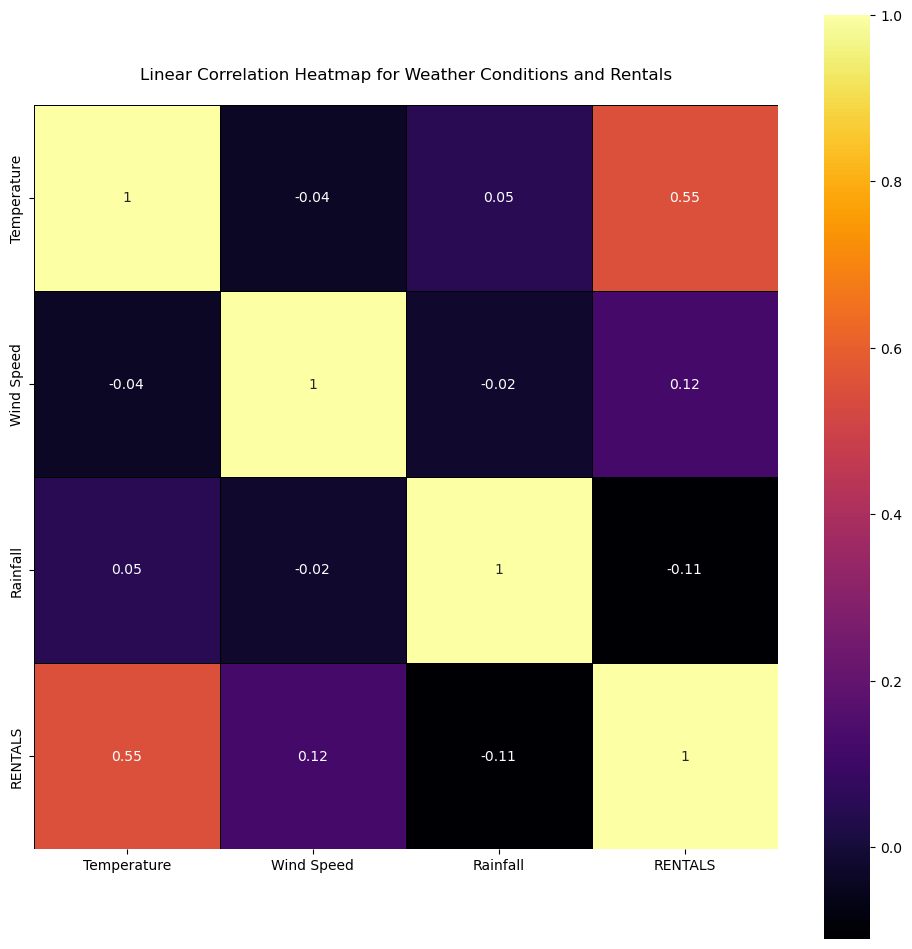

In [31]:

import seaborn as sns
import matplotlib.pyplot as plt

# Creates a correlation matrix
bikes_corr=bikes[['Temperature', 'Wind Speed', 'Rainfall', 'RENTALS']].corr().round(2)

# specifying plot size into a DataFrame
fig, ax = plt.subplots(figsize=(12, 12))

# Create a heatmap showing the linear correlation of weather conditions and rentals
sns.heatmap(data = bikes_corr, # Dataframe
            cmap = 'inferno',  # Color of the 
         square  = True,       # Represents a scatter plot
           annot = True,       # Numbers detail on the heatmap
       linecolor = 'black',
    linewidths = 0.5)
            
# Title of plot
plt.title(label = """
Linear Correlation Heatmap for Weather Conditions and Rentals
""")

# Showing the final visualization
plt.show(block=True)


#### Linear Correlation Heatmap for Weather Conditions and Rentals Analysis

The present heatmap shows the linear correlation between key weather variables and the number of bike rentals. The source and insight reveal that the main key variables that affect the demand for rental bikes are Temperature, Wind Speed, and Rentals. The heatmap reflects a moderate positive correlation between temperature and rentals (0.55), meaning that warm weather encourages users to choose biking as an alternative transportation. In contrast, rainfall (-0.11) and wind speed (-0.12) show a negative correlation, meaning that bad weather conditions discourage bike use. This analysis shows that warm weather conditions play a critical role in the total demand. Overall, the graph highlights the importance of weather in rental business operations planning. 


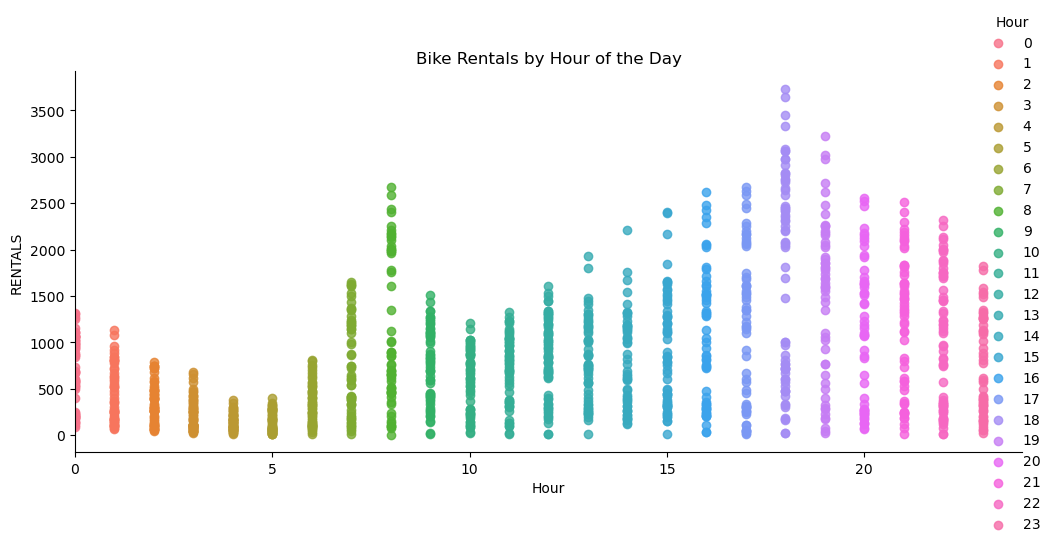

In [26]:
# Creating a scatter plot for Hour and Rental
sns.lmplot (x = 'Hour',      # x-axis feature
            y = 'RENTALS',   # y-axis feature
          hue = 'Hour',      # Colors points by hour
      scatter = True,        # Represents a scatter plot
      fit_reg = False,       # Represents a regression line
       aspect = 2,           # Aspect ratio for plot
         data = bikes)       # Dataset

# Titles and Axis labels
plt.title       (label  = 'Bike Rentals by Hour of the Day')
plt.xlabel      (xlabel = 'Hour'          )
plt.ylabel      (ylabel = 'RENTALS'       )
plt.xlim        (left   = 0, right = 24   )
plt.tight_layout(pad    = 2               )

# Showing the final visualization
plt.show        (block  = True            )


#### Bike Rentals by Hour of the Day Analysis
The scatter plot shows the distribution between the range of hours during the day and the number of rentals. The visualization shows two important peaks: one at 8 AM and the other at 5 – 6 PM. These peaks represent morning and evening rush hours, which means that a majority of users utilize bikes as a mode of transportation from school or work. Midday hours have moderate activity, usual to local activities, and short distances. On the other hand, rentals fall significantly after 11 pm and continue until early hours of the next day. This graph shows the cyclical demand for bicycles in a day. Companies can use this information to optimize bike availability and maintenance scheduling throughout the day. Overall, after 3 pm, the bike demand starts to go up, also due to tourist consumption.

#### **2.3 Insight Three: "The Future of Mobility"**
According to the McKinsey report identifies how urban mobility is shifting towards more sustainable and alternative transport, with micromobility like bicycles and e-scooters being an important contributor. The report states that 60–70% of urban journeys could be replaced with micromobility solutions over the short term. As cities look for emission reduction and decongestion, demand for bicycle rental systems will rise globally. 
This report emphasizes that Asia, Europe, and North America are leading this trend, but indicates that there are other potential emerging regions like Latin America. However, this trend supports the expansion of rental bikes as a key part of a smart, clean, and accessible transportation system shortly.

### **3. References**
Grand View Research. (2024). *Bike & scooter rental market size, share & trends analysis report by vehicle type, by application, by region, and segment forecasts, 2024–2030.* https://www.grandviewresearch.com/industry-analysis/bike-scooter-rental-market-report

Jang, H., Lee, Y., & Park, J. (2024). *Short-term demand forecasting for bike-sharing systems using machine learning techniques: A case study in Seoul. Smart Cities and Society.* https://doi.org/10.1016/j.scsoc.2024.100105

Woetzel, J., Baig, F., Choi, W., Garemo, N., Mischke, J., & Poh, F. (2019, February 25). *The future of mobility: How transportation is evolving. McKinsey & Company.* https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/the-future-of-mobility-mobility-evolves

 ### **4. Analysis Questions**

 1. **Why are the majority of users renting bicycles?**
According to the dataset, the majority of users rent bicycles during June, on Thursday, specifically in the summer season, and this trend happens on non-holidays. These variables represent the most frequent values in the data, highlight a clear pattern in the consumer behavior. Summer is the season with the highest total number of rentals (420,714), followed by Autumn (346,564). This insight suggests that while Autumn and Spring represent a significant number of rentals, the Summer season has a strong demand, due to good weather, school vacations or tourism. Additionally, the preferences for renting bikes on regular weekdays and non-holidays indicate that bike rentals are commonly used for routine activities as commuting or local activities.
   
 2. **Are there ideal weather conditions that create high bike rental demand? If so, what are they?**
The dataset and insight show that there are ideal weather conditions that influence the high demand for rental bikes. Most users prefer to rent bikes in dry, sunny, and warm conditions, when the weather is typically warmer and more comfortable for outdoor activities. These align with the most rental numbers happening in Summer, especially in June, with holidays, school vacations, and tourism increasing outdoor activity. Therefore, high temperatures and low rainfall appear to be ideal weather factors that drive up the demand for bike rentals. This is further supported by a positive correlation of 0.55 between Temperature and Rentals, and a negative correlation of -0.11 between Rainfall and Rentals.
   
 3. **How should the company strategize based on your results? In other words, what actionable steps can the company take in order to take advantage of your insights?**
Based on insights from data, the company must prioritize its operations and marketing during the summer season, when there are the highest demand for bike rentals occurs, especially in June. Initiative must be focused on cities and holiday locations with ideal weather conditions, such as warm temperatures and low rainfall, because these foster more rentals. Since most riders rely on rental bikes for daily transportation, weekday supply and value-priced commuter packages must be marketed by the company. Moreover, there are opportunities to expand in underpenetrated markets, primarily in Latin America, where the rental bike is underdeveloped due to rising urban populations. Investment in tourist campaigns and infrastructure partnerships in these markets can drive long-term growth and brand recognition.

### **5. Conclusion**

In summary, rental bicycle demand is driven by reasons such as commuting, especially among professionals and students, and lifestyle-related factors such as tourism and seasonal outdoor activities. The trend reflects growing popularity for sustainable, convenient, and flexible transport. The analysis of the dataset, insight, and credible sources shows that favorable warm weather, as summer promotes higher rental activity, indicating seasonality. As reported in recent case studies and serious reports, the micromobility sector will continue to grow, opening up promising growth opportunities for rental companies. To stay competitive, these companies should align their approaches with shifting consumer behavior and target new markets, especially in fast-growing markets like Latin America, where the growth potential is still changing. 